# Validation notebook of Nordic system (SMIB): Stepss vs EMTP
# RMS and EMT simulation results for different scenarios

## <center> Simulation setup </center>

| | Stepss  | EMTP |
|-| :---:  | :---: |
| Domain | RMS |  EMT |
| Duration | 8s | 8s |
| Time step | 1ms (fix) |  50us |
| Solver solution method | DAE |Nodal |
| Solver integration method | Backward Differentiation Formula (order2) |Trapezoidal |

## Plotting Function

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np



In [2]:
def autoscale_y(ax,margin):
    """This function rescales the y-axis based on the data that is visible given the current xlim of the axis.
    ax -- a matplotlib axes object
    margin -- the fraction of the total height of the y-data to pad the upper and lower ylims"""

    def get_bottom_top(line):
        xd = line.get_xdata()
        yd = line.get_ydata()
        lo,hi = ax.get_xlim()
        y_displayed = yd[((xd>lo) & (xd<hi))]
        h = np.max(y_displayed) - np.min(y_displayed)
        bot = np.min(y_displayed)-margin*h
        top = np.max(y_displayed)+margin*h
        return bot,top

    lines = ax.get_lines()
    bot,top = np.inf, -np.inf

    for line in lines:
        new_bot, new_top = get_bottom_top(line)
        if new_bot < bot: bot = new_bot
        if new_top > top: top = new_top

    ax.set_ylim(bot,top)

In [18]:
def plot_results(scenario, stepss_file, emtp_file):
    plt.rc('font', family='serif', serif='Times New Roman')
    plt.rc('text', usetex=True) 

    stepss = pd.read_csv(stepss_file, sep = '\s+', comment=";", keep_default_na=False, names=('time',  'P_MW', 'RotorSpeed', 'Vf', 'Vt'))
    #emtp = pd.read_csv(emtp_file, sep = '\s+', comment=";", keep_default_na=False, names=('time',  'P_MW', 'RotorSpeed', 'Vf', 'Vt'))
    emtp= pd.read_csv(emtp_file, sep = '\t', low_memory=False)
    emtp.drop(index=emtp.index[0], axis=0, inplace=True)
    emtp.rename(columns=lambda x: x.strip(), inplace=True)

    stepss_variables= [ "P_MW", "RotorSpeed","Vf", "Vt"]
    #emtp_variables= ["P_pu",  "Rotor_speed","Vf", "Vt"]
    emtp_variables= ['G19/Pe_SM19', 'G19/Omega_1_SM19', 'G19/Vf_SM19', 'G19/Vt']
    
    labels= [ "P (MW)", "$\omega_r$ (p.u.)", "$V_f$ (p.u)", "$G19-V_t$ (p.u)"]
   
    plt.close('all')
    fig=plt.figure(figsize=(15, 12))
    plt.suptitle(scenario , fontsize=16)
    plt.subplots_adjust(top=0.9, hspace=0.4, wspace=0.4)
    plt.tight_layout()
    line_width=2
    for n, (x, y,  l) in enumerate(zip(stepss_variables, emtp_variables, labels)):
        ax = plt.subplot(4, 1, n + 1)
        ax.plot(stepss['time'], stepss[x], color= 'black', linestyle='-', label='STEPSS',linewidth=2) 
        if x== "Vf":
             cf= stepss[x][10]     
     
        if y== 'G19/Pe_SM19':
              
              #ax.plot(emtp['X axis'][::10], emtp[y][::10]*500, color= 'red', linestyle=':', label='EMTP',linewidth=line_width)
              ax.plot(pd.to_numeric(emtp['X axis'][::10]), pd.to_numeric(emtp[y][::10])*500, color= 'red', linestyle=':', label='EMTP', linewidth=line_width)
              print(emtp[y][5])
        
        elif y== 'G19/Vf_SM19':
             sf=cf/pd.to_numeric(emtp[y][10])
             ax.plot(pd.to_numeric(emtp['X axis'][::10]), pd.to_numeric(emtp[y][::10])*sf, color= 'red', linestyle=':', label='EMTP', linewidth=line_width)
        
        else:
              #ax.plot(emtp['X axis'][::10], emtp[y][::10], color= 'red', linestyle=':', label='EMTP')
              ax.plot(pd.to_numeric(emtp['X axis'][::10]), pd.to_numeric(emtp[y][::10]), color= 'red', linestyle=':', label='EMTP', linewidth=line_width)
        
        ax.set_title(l, fontname='Times New Roman', fontsize=16)
        ax.set_xlabel('Time', fontname='Times New Roman', fontsize=16)
        ax.set_ylabel(l, fontname='Times New Roman', fontsize=16)
        ax.tick_params(axis='both', which='major',labelsize=16)
        ax.tick_params(axis='both', which='minor', labelsize=16)
        ax.legend(fontsize=16, loc="lower right")
        ax.legend(fontsize=16, loc="upper right")
        #ax.set_xlim([2, 6])

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make room for the title
    plt.savefig('plot_results.jpg', format='jpg', dpi=300)
    plt.savefig('plot_results.pdf', format='pdf')
    plt.show()

        # if ax.get_title() in ["P (MW)"]:
        #     autoscale_y(ax, 0.1)
        # else:
        #     autoscale_y(ax, 0.1)

   600.10257082E-3


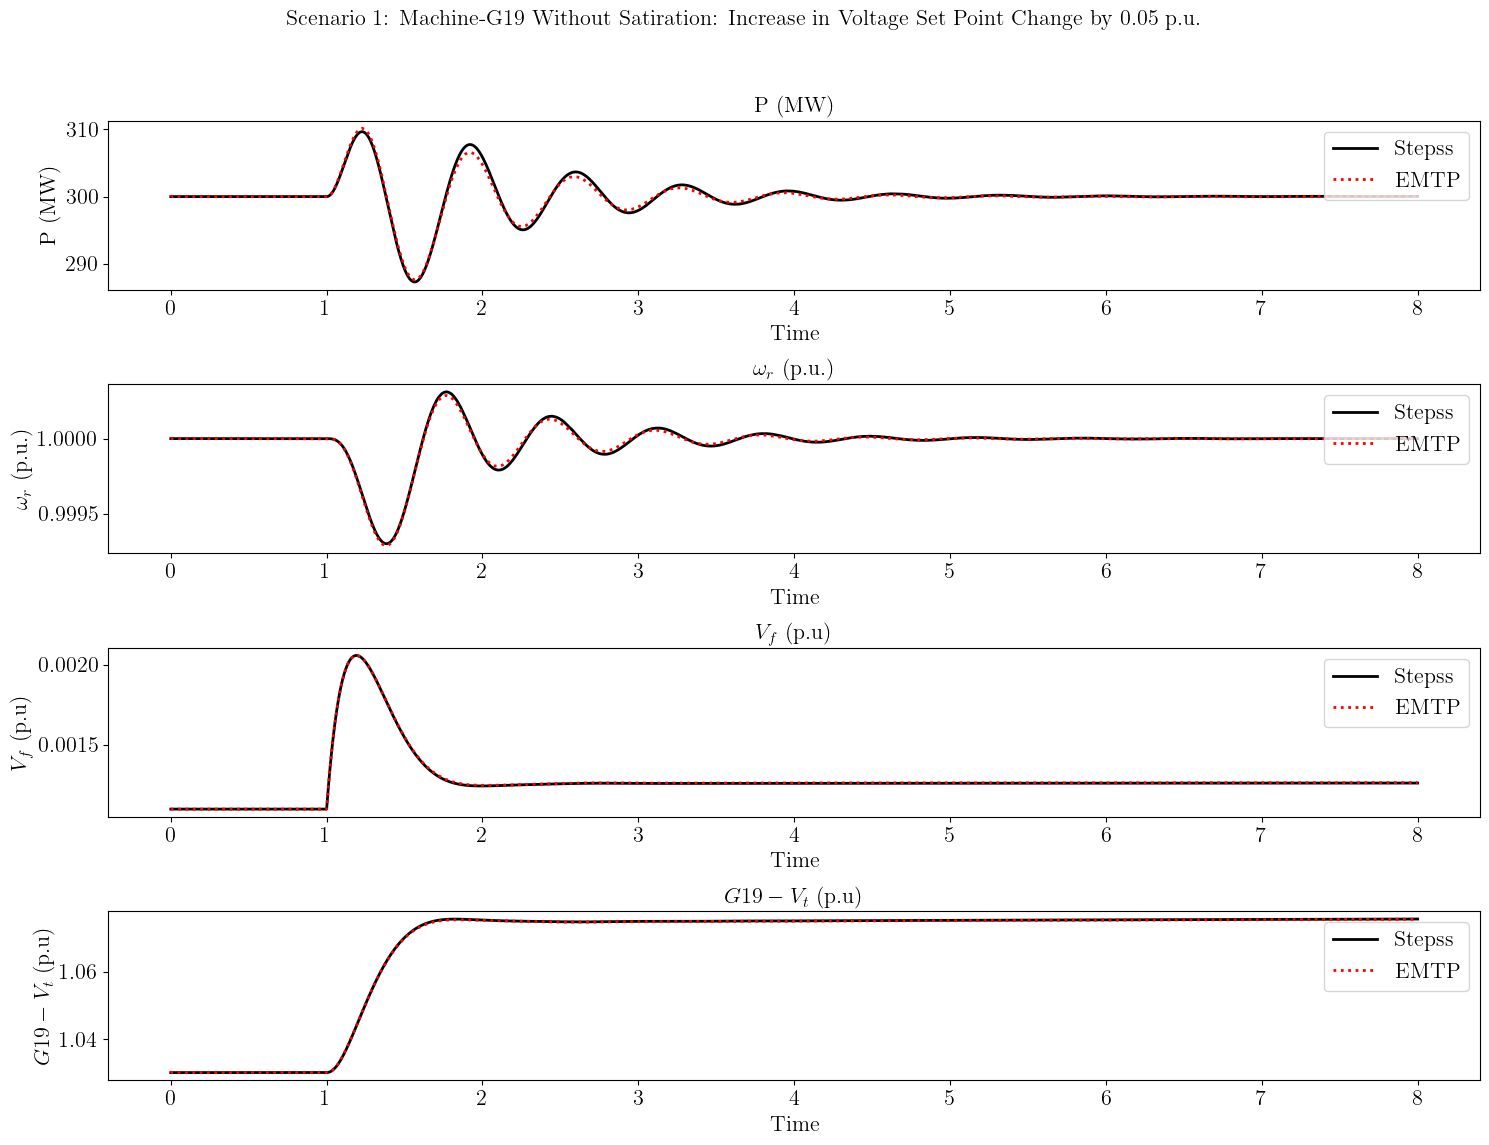

In [19]:
dir_path1 = r"C:\Users\rashmiprasad\OneDrive - Delft University of Technology\Desktop\Nodic\Thierry\SMIBG19\Unsaturated\STEPSSG19UnSatSetPointChange.cur"
dir_path2 = r"C:\Users\rashmiprasad\OneDrive - Delft University of Technology\Desktop\Nodic\Thierry\SMIBG19\Unsaturated\EMTP\EMTPG19UnSatSetPointChange.txt"

plot_results('Scenario 1: Machine-G19 Without Satiration: Increase in Voltage Set Point Change by 0.05 p.u.',dir_path1, dir_path2)

   600.10257082E-3


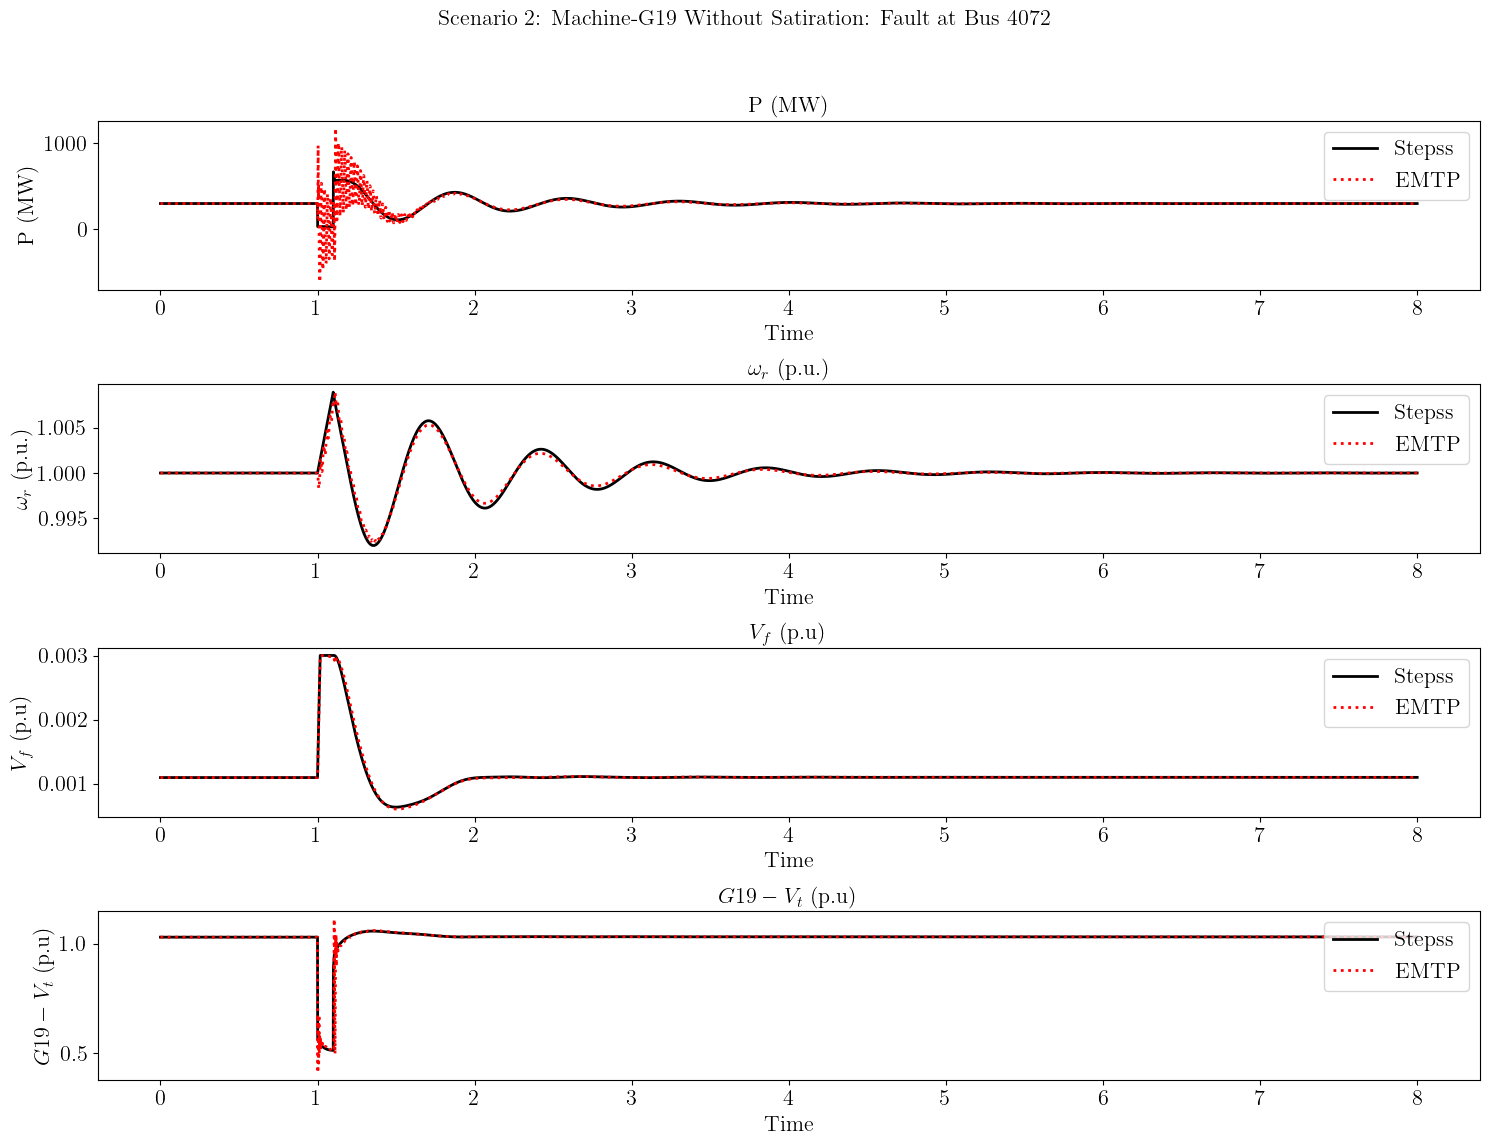

In [20]:
dir_path1 = r"C:\Users\rashmiprasad\OneDrive - Delft University of Technology\Desktop\Nodic\Thierry\SMIBG19\Unsaturated\STEPSSG19UnSatFault.cur"
dir_path2 = r"C:\Users\rashmiprasad\OneDrive - Delft University of Technology\Desktop\Nodic\Thierry\SMIBG19\Unsaturated\EMTP\EMTPG19UnSatFault.txt"

plot_results('Scenario 2: Machine-G19 Without Satiration: Fault at Bus 4072',dir_path1, dir_path2)

   600.10257082E-3


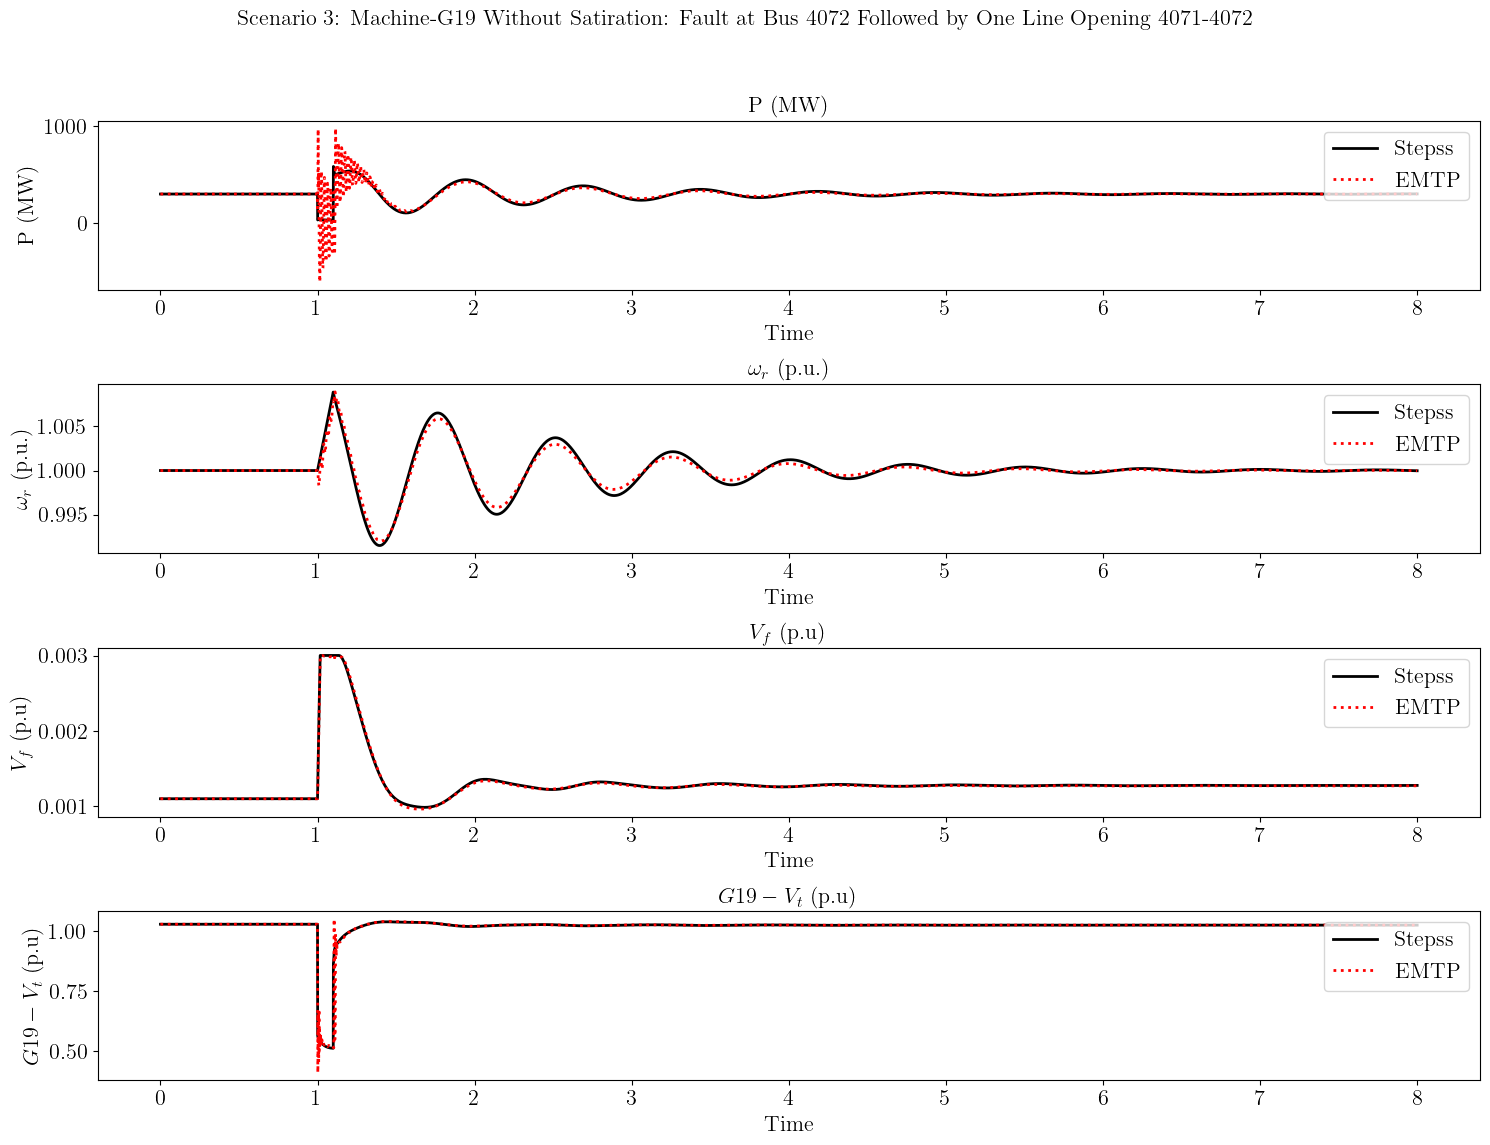

In [21]:
dir_path1 = r"C:\Users\rashmiprasad\OneDrive - Delft University of Technology\Desktop\Nodic\Thierry\SMIBG19\Unsaturated\STEPSSG19UnSatFaultLineBreak.cur"
dir_path2 = r"C:\Users\rashmiprasad\OneDrive - Delft University of Technology\Desktop\Nodic\Thierry\SMIBG19\Unsaturated\EMTP\EMTPG19UnSatFaultLineBreak.txt"

plot_results('Scenario 3: Machine-G19 Without Satiration: Fault at Bus 4072 Followed by One Line Opening 4071-4072',dir_path1, dir_path2)

In [ ]:
dir_path1 = r"C:\Users\rashmiprasad\OneDrive - Delft University of Technology\Desktop\Nodic\Thierry\SMIBG19\Unsaturated\STEPSSG19UnSatSetPointChange.cur"
dir_path2 = r"C:\Users\rashmiprasad\OneDrive - Delft University of Technology\Desktop\Nodic\Thierry\SMIBG19\Unsaturated\EMTP\EMTPG19UnSatSetPointChange.txt"

plot_results('Scenario 4: Machine-G19 With Satiration: Increase in Voltage Set Point Change by 0.05 p.u.',dir_path1, dir_path2)

In [ ]:
dir_path1 = r"C:\Users\rashmiprasad\OneDrive - Delft University of Technology\Desktop\Nodic\Thierry\SMIBG19\Unsaturated\STEPSSG19UnSatSetPointChange.cur"
dir_path2 = r"C:\Users\rashmiprasad\OneDrive - Delft University of Technology\Desktop\Nodic\Thierry\SMIBG19\Unsaturated\EMTP\EMTPG19UnSatSetPointChange.txt"

plot_results('Scenario 5: Machine-G19 With Satiration: Fault at Bus 4072',dir_path1, dir_path2)

In [ ]:
dir_path1 = r"C:\Users\rashmiprasad\OneDrive - Delft University of Technology\Desktop\Nodic\Thierry\SMIBG19\Unsaturated\STEPSSG19UnSatSetPointChange.cur"
dir_path2 = r"C:\Users\rashmiprasad\OneDrive - Delft University of Technology\Desktop\Nodic\Thierry\SMIBG19\Unsaturated\EMTP\EMTPG19UnSatSetPointChange.txt"

plot_results('Scenario 3: Machine-G19 With Satiration: Fault at Bus 4072 Followed by One Line Opening 4071-4072',dir_path1, dir_path2)

In [ ]:
def plot_results(scenario, emtp1_file, emtp2_file):
    plt.rc('font', family='serif', serif='Times New Roman')
    plt.rc('text', usetex=True) 

    emtp1= pd.read_csv(emtp1_file, sep = '\t', low_memory=False)
    emtp1.drop(index=emtp1.index[0], axis=0, inplace=True)
    emtp1.rename(columns=lambda x: x.strip(), inplace=True)
    #emtp = pd.read_csv(emtp_file, sep = '\s+', comment=";", keep_default_na=False, names=('time',  'P_MW', 'RotorSpeed', 'Vf', 'Vt'))
    emtp2= pd.read_csv(emtp2_file, sep = '\t', low_memory=False)
    emtp2.drop(index=emtp2.index[0], axis=0, inplace=True)
    emtp2.rename(columns=lambda x: x.strip(), inplace=True)


    emtp1_variables= ['G19/Pe_SM19', 'G19/Omega_1_SM19', 'G19/Vf_SM19', 'G19/Vt']
    emtp2_variables= ['G19/Pe_SM19', 'G19/Omega_1_SM19', 'G19/Vf_SM19', 'G19/Vt']
    labels= [ "P (MW)", "$\omega_r$ (p.u.)", "$V_f$ (p.u)", "$G19-V_t$ (p.u)"]
   
    plt.close('all')
    fig=plt.figure(figsize=(15, 12))
    plt.suptitle(scenario , fontsize=16)
    plt.subplots_adjust(top=0.9, hspace=0.4, wspace=0.4)
    plt.tight_layout()
    line_width=2
    for n, (x, y,  l) in enumerate(zip(emtp1_variables, emtp2_variables, labels)):     
        if y== 'G19/Pe_SM19':
              
              #ax.plot(emtp['X axis'][::10], emtp[y][::10]*500, color= 'red', linestyle=':', label='EMTP',linewidth=line_width)
              ax.plot(pd.to_numeric(emtp1['X axis'][::10]), pd.to_numeric(emtp1[y][::10])*500, color= 'red', linestyle=':', label='EMTP', linewidth=line_width)
              print(emtp1[y][5])
        
        elif y== 'G19/Vf_SM19':
             sf=cf/pd.to_numeric(emtp[y][10])
             ax.plot(pd.to_numeric(emtp['X axis'][::10]), pd.to_numeric(emtp[y][::10])*sf, color= 'red', linestyle=':', label='EMTP', linewidth=line_width)
        
        else:
              #ax.plot(emtp['X axis'][::10], emtp[y][::10], color= 'red', linestyle=':', label='EMTP')
              ax.plot(pd.to_numeric(emtp['X axis'][::10]), pd.to_numeric(emtp[y][::10]), color= 'red', linestyle=':', label='EMTP', linewidth=line_width)
        if x== "Vf":
             cf= stepss[x][10]     
     
        if y== 'G19/Pe_SM19':
              
              #ax.plot(emtp['X axis'][::10], emtp[y][::10]*500, color= 'red', linestyle=':', label='EMTP',linewidth=line_width)
              ax.plot(pd.to_numeric(emtp['X axis'][::10]), pd.to_numeric(emtp[y][::10])*500, color= 'red', linestyle=':', label='EMTP', linewidth=line_width)
              print(emtp[y][5])
        
        elif y== 'G19/Vf_SM19':
             sf=cf/pd.to_numeric(emtp[y][10])
             ax.plot(pd.to_numeric(emtp['X axis'][::10]), pd.to_numeric(emtp[y][::10])*sf, color= 'red', linestyle=':', label='EMTP', linewidth=line_width)
        
        else:
              #ax.plot(emtp['X axis'][::10], emtp[y][::10], color= 'red', linestyle=':', label='EMTP')
              ax.plot(pd.to_numeric(emtp['X axis'][::10]), pd.to_numeric(emtp[y][::10]), color= 'red', linestyle=':', label='EMTP', linewidth=line_width)
        
        ax.set_title(l, fontname='Times New Roman', fontsize=16)
        ax.set_xlabel('Time', fontname='Times New Roman', fontsize=16)
        ax.set_ylabel(l, fontname='Times New Roman', fontsize=16)
        ax.tick_params(axis='both', which='major',labelsize=16)
        ax.tick_params(axis='both', which='minor', labelsize=16)
        ax.legend(fontsize=16, loc="lower right")
        ax.legend(fontsize=16, loc="upper right")
        #ax.set_xlim([2, 6])

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make room for the title
    plt.savefig('plot_results.jpg', format='jpg', dpi=300)
    plt.savefig('plot_results.pdf', format='pdf')
    plt.show()

        # if ax.get_title() in ["P (MW)"]:
        #     autoscale_y(ax, 0.1)
        # else:
        #     autoscale_y(ax, 0.1)